# Lab 4: Maximum Likelihood Estimation

**Author:** [YOUR NAME]

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Practice different estimation methods to find the best PDF for mass distribution data

In this lab, we will analyze a mass distribution dataset using the **Cauchy distribution** (also known as Lorentz or Breit-Wigner distribution). The Cauchy distribution has two parameters:
- **Location parameter (m)**: central mass value
- **Scale parameter (Γ)**: width of the distribution

**Documentation:** [scipy.stats.cauchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html)

## Setup and Data

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy

In [2]:
# Mass distribution dataset (Units: GeV)
mass = [7.95442531, 10.60408232, 9.9020277, 10.42288788, 17.2193401, 10.06076572,
        10.00176003, 7.8289388, 9.55481385, 9.99981543, 10.3156156, 10.70547087,
        9.80374407, 7.62085689, 9.60747351]

**Your theoretical prediciton**
- What Cauchy distribution is it? Try many centers and widths to match the data!

# Task 1: Visualization (3 points)

Create two types of visualizations for the mass distribution data.

## Part (a): Unbinned Distribution

Draw the unbinned mass distribution showing individual data points as a scatter plot.

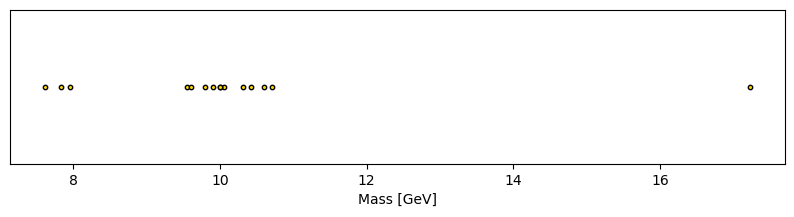

In [3]:
# TODO: Create a scatter plot showing individual mass measurements
fig, ax = plt.subplots(figsize=(10,2))

y = np.zeros_like(mass) # scatter baseline

ax.scatter(mass, y, color='gold', edgecolor='black', s=10, zorder=3)
ax.set_xlabel("Mass [GeV]")
ax.set_yticks([]) # turns off y axis ticks ( we don't need it!)
plt.show()

## Part (b): Binned Distribution with Error Bars

Create a histogram with bin size 0.5 GeV (range 0-20 GeV) including Poisson error bars.

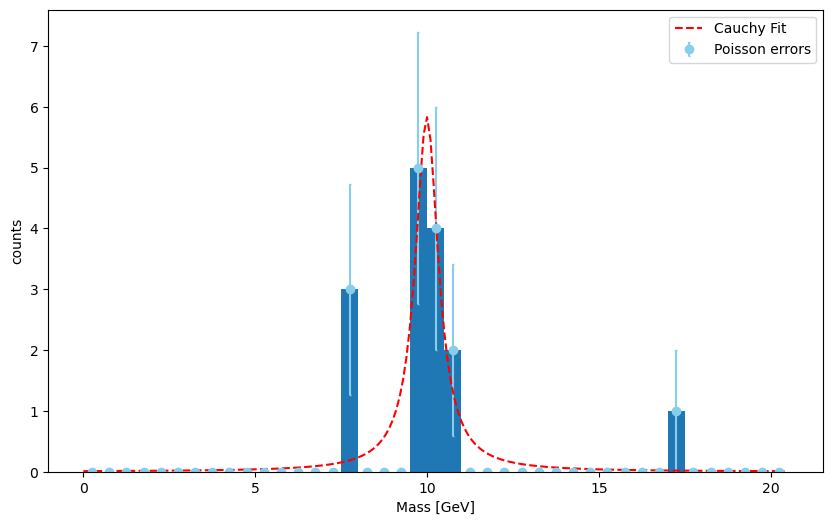

In [4]:
# TODO: Create histogram with error bars (use sqrt(N) for Poisson errors) 

binSize = 0.5
# histogram params
bins = np.arange(0, 21, binSize)
counts, edges = np.histogram(mass, bins=bins)
centers = 0.5 * (edges[:-1] + edges[1:]) # for errorbars

errors = np.sqrt(counts)  # Poisson errors

# plot
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(edges[:-1], edges, weights=counts)
ax.errorbar(centers, counts, yerr=errors, fmt='o', color='skyblue', capsize=1, label='Poisson errors')
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("counts")


# TODO: Overplot your theoretical Cauchy PDF match histogram (scales from probability to expected counts per bin)

loc, scale = cauchy.fit(mass)
dist = cauchy(loc=loc, scale=scale)

xx = np.arange(0, 20.5, 0.1) #dummy x
yy = dist.pdf(xx) * (binSize * len(mass)) # scale factor for pdf -> count
ax.plot(xx,yy, '--', color='r', label='Cauchy Fit')
ax.legend()
plt.show()

# Task 2: Maximum Likelihood Estimation (4 points)

Use maximum likelihood estimation to find the best-fit parameters for the Cauchy distribution.

## Part (a): Negative Log-Likelihood Function

Construct an unbinned negative log-likelihood function that returns -2*log(L) for the Cauchy distribution.

In [5]:
# TODO: Create your NLL function. HINT: Calculate log-likelihood using scipy.stats.cauchy.logpdf

def nll_cauchy(data, loc, scale):
    logL = cauchy.logpdf(data, loc=loc, scale=scale)
    nll = -2 * np.sum(logL)  # -2 * log L
    return nll

## Part (b): Parameter Space Scanning

Perform a grid search over the (mass, width) parameter space to find the minimum NLL.

In [6]:
# TODO: Define parameter ranges

# TODO: Create range around expected mass value
nMass = 300 
mass_range = np.linspace(8, 12, nMass) # [8, 12]
# TODO: Create range for width parameter
nWidth = 300
width_range = np.linspace(0.02, 4, nWidth)

# TODO: Create parameter grids using np.meshgrid
mass_grid, width_grid = np.meshgrid(mass_range, width_range)

# TODO: Calculate NLL for each parameter combination
NLL_grid = np.zeros_like(mass_grid) # holder to store NLL values
for i in range(nMass):
    for j in range(nWidth):
        NLL_grid[i, j] = nll_cauchy(mass, mass_grid[i,j], width_grid[i,j])

# TODO: Find minimum and extract best-fit parameters
min_index = np.unravel_index(np.argmin(NLL_grid), NLL_grid.shape) # get [i,j]
mass_best = mass_grid[min_index]
width_best = width_grid[min_index]

# print results
print("Best-fit Paramaters")
print(f"Mass\t:\t{mass_best}\nWidth\t:\t{width_best}")

Best-fit Paramaters
Mass	:	9.993311036789297
Width	:	0.4060200668896321


## Part (c): 2D Contour Plot

Create a 2D contour plot showing the NLL landscape with contour levels up to min_nll + 5.

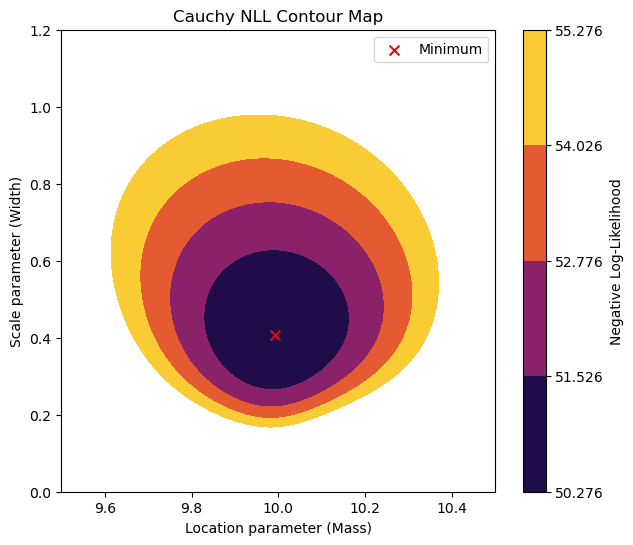

In [7]:
# TODO: Create 2D contour plot of NLL
# TODO: Mark the minimum point
# TODO: Add appropriate labels and colorbar

min_nll = np.min(NLL_grid) # pick out global min value
cLevel = np.linspace(min_nll, min_nll + 5, 5) # contour levels

fig, ax = plt.subplots(figsize=(7,6))
cont = ax.contourf(mass_grid, width_grid, NLL_grid, levels=cLevel, cmap='inferno')
fig.colorbar(cont, ax=ax, label='Negative Log-Likelihood')
ax.scatter(mass_best, width_best, color='red', marker='x', s=50, label='Minimum') # minimum point

ax.set_xlabel('Location parameter (Mass)')
ax.set_ylabel('Scale parameter (Width)')
ax.set_title('Cauchy NLL Contour Map')
ax.legend()
# "zoom in" to appropriate scale
ax.set_xlim(9.5, 10.5)
ax.set_ylim(0, 1.2)

plt.show()

## Bonus: 3D Surface Plot (2 points)


In [29]:
from mpl_toolkits.mplot3d import Axes3D 
from ipywidgets import interact, fixed, FloatSlider
%matplotlib widget

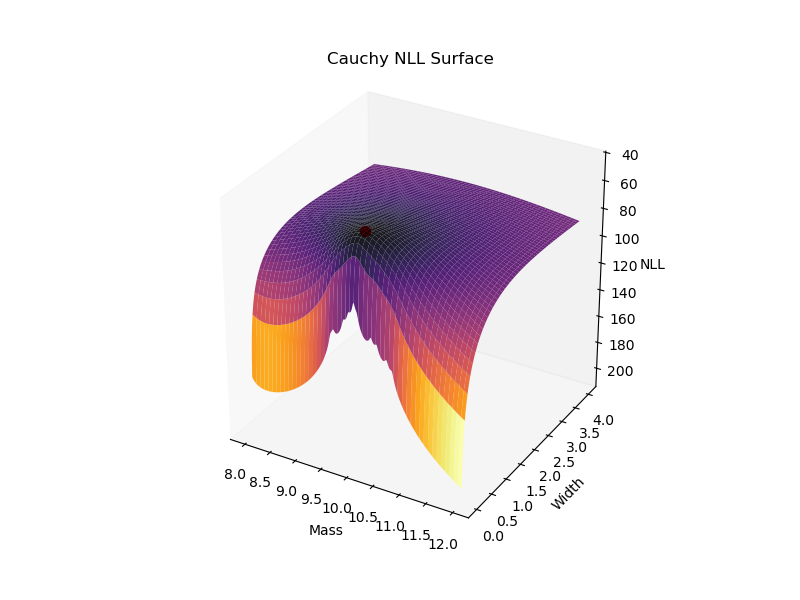

In [30]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(mass_grid, width_grid, NLL_grid, cmap='inferno', edgecolor='none', alpha=0.9)
ax.grid(visible=False)
ax.set_box_aspect(aspect=(1, 1, 1))
ax.scatter(mass_best, width_best, min_nll, color='red', s=50, label='Minimum')
ax.invert_zaxis() # flip z (positive log likelihood) to see the feature better

ax.set_xlabel('Mass')
ax.set_ylabel('Width')
ax.set_zlabel('NLL')
ax.set_title('Cauchy NLL Surface')

plt.show()

## Part (d): Data with Best-Fit PDF

Plot the histogram overlaid with the theoretical Cauchy distribution using best-fit parameters.

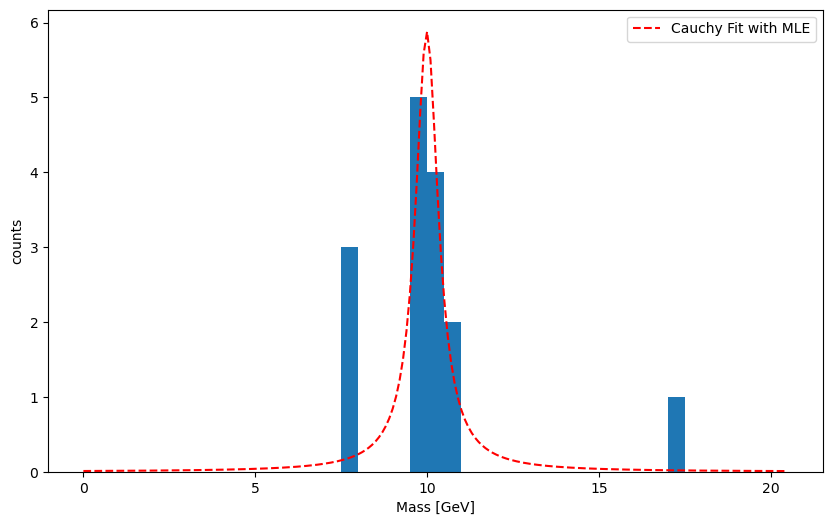

In [8]:
# TODO: Plot histogram of data
# TODO: Calculate and plot theoretical PDF using best-fit parameters
# TODO: Scale PDF to match histogram (scales from probability to expected counts per bin)
plt.ioff() #turn off widget magic

#### HISTOGRAM ####
binSize = 0.5
# histogram params
bins = np.arange(0, 21, binSize)
counts, edges = np.histogram(mass, bins=bins)
centers = 0.5 * (edges[:-1] + edges[1:]) # for errorbars

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(edges[:-1], edges, weights=counts)
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("counts")

#### BEST FIT CAUCHY DISTRIBUTION ####
best_fit_dist = cauchy(loc=mass_best, scale=width_best)
xx = np.arange(0, 20.5, 0.1) #dummy x
yy = best_fit_dist.pdf(xx) * (binSize * len(mass)) # scale factor for pdf -> count
ax.plot(xx,yy, '--', color='r', label='Cauchy Fit with MLE')
ax.legend()
plt.show()

# Task 3: Maximum Likelihood vs Chi-squared Method (3 points)

Compare maximum likelihood and chi-squared fitting methods by fixing the width parameter.

## Part (a): Likelihood Profile

Plot -2logL/L_max as a function of mass parameter with fixed width.

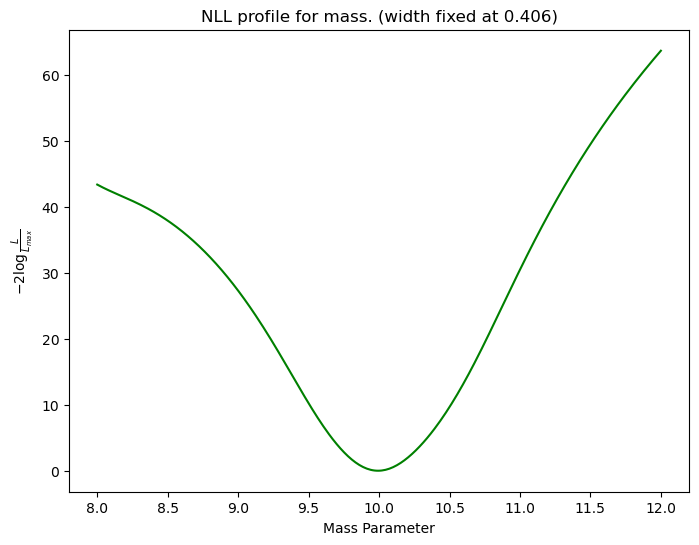

In [19]:
# TODO: Fix width to your best-fit value
#width_fixed = width_best
# TODO: Scan mass parameter and calculate NLL profile
# TODO: Normalize by minimum and plot

# We can extract NLL profile (nMass x 1) from NLL grid (nWidth x nMass) we calculated eariler
# get index for best width, extract corresponding row as 1d array
width_index = min_index[0] # recall [i,j] for min_nll
NLL_prof = NLL_grid[width_index, :]

# L_max is min L in our case (NEGATIVE log likelihood)
# -2 log(L/L_min) = -2 (logL - logL_min) = (-2logL)-(-2logL_min)
NLL_prof_norm = NLL_prof - np.min(NLL_prof)

# plot mass vs normalized nll profile
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mass_range, NLL_prof_norm, 'g')
ax.set_xlabel("Mass Parameter")
ax.set_ylabel(r"$-2 \log \frac{L}{L_{max}}$")
ax.set_title(f"NLL profile for mass. (width fixed at {width_best:.3f})")
plt.show()

## Part (b): Chi-squared Method

Construct and minimize the chi-squared function for binned data.

In [20]:
# TODO: Create your chi-squared function. Scan mass parameter for chi-squared
def chi2_cauchy(mass, width, counts, edges):
    centers = 0.5 * (edges[:-1] + edges[1:]) # midpoints to evaluate pdf at
    bin_width = edges[1] - edges[0] # our bins are evenly spaced so we only need 1 value
    # expected counts per bin
    pdf_evals = cauchy.pdf(centers, loc=mass, scale=width)
    N_total = np.sum(counts)
    N_expect = pdf_evals * N_total * bin_width # scales pdf to expected counts
    mask = N_expect > 0 # avoid dividing by zero
    chi2 = np.sum(((counts[mask] - N_expect[mask])**2.0)/N_expect[mask]) # sum (O-E)^2/E
    return chi2
    
# TODO: Calculate Δχ² = χ²(m) - χ²_min
chi2_prof = np.zeros_like(mass_range) # holder to store chi2 for each mass value
for i, m in enumerate(mass_range):
    chi2_prof[i] = chi2_cauchy(m, width_best, counts, edges) # counts, edges from first histogram
chi2_min = np.min(chi2_prof)
delta_chi2 = chi2_prof - chi2_min #Δχ² = χ²(m) - χ²_min, 1d array

# print χ²_min
print(f"Minimum χ²\t:\t{chi2_min:.5f}")

Minimum χ²	:	97.52893


## Part (c): Method Comparison

Compare maximum likelihood and chi-squared methods by plotting both profiles.

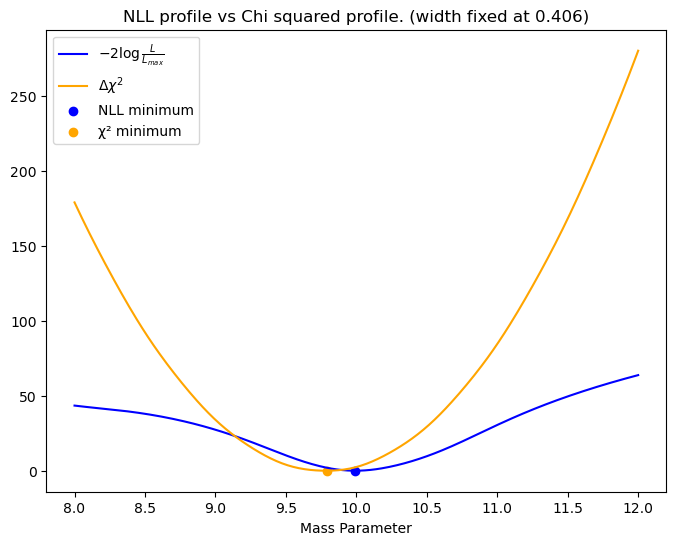

In [22]:
# TODO: Plot both curves on same axes
# - blue: Maximum Likelihood 
# - orange: Chi-squared

# min points for each
min_nll_ind = np.argmin(NLL_prof_norm)
min_chi2_ind = np.argmin(delta_chi2)
#plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mass_range, NLL_prof_norm, 'blue', label=r"$-2 \log \frac{L}{L_{max}}$")
ax.plot(mass_range, delta_chi2, 'orange', label=r"$\Delta \chi^2$")
ax.scatter(mass_range[min_nll_ind], NLL_prof_norm[min_nll_ind], color='blue', label='NLL minimum')
ax.scatter(mass_range[min_chi2_ind], delta_chi2[min_chi2_ind], color='orange', label='χ² minimum')
ax.set_xlabel("Mass Parameter")
ax.legend()
ax.set_title(f"NLL profile vs Chi squared profile. (width fixed at {width_best:.3f})")
plt.show()
# TODO: Compare the shape and minimum positions
# TODO: Add observations about which method is more precise

## Observation

Chi2 looks hyperbolic and is concave up. Rapidly increases as you move away from the minimum.
NLL is concave up near the minimum, but is concave down as you move away from the minimum.
Both minimums are not too far away from each other (less than the bin width of 0.5) which is not too bad given that chi squared required binned data, as opposed to MLE method using unbinned, 'raw' data.

Due to this nature, MLE method is more precise than chi squred method. Unbinned data points are "weighted" "correctly" (for the lack of my vocabulary??.. you know what I mean), whereas binned data forces all data points within the bin to hold the same weight.

# Bonus: Using iminuit Package (3 points)

Use the iminuit package for professional maximum likelihood fitting.

In [23]:
# TODO: Install and import iminuit
try:
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    print("iminuit imported successfully!")
    IMINUIT_AVAILABLE = True
except ImportError:
    # print("Installing iminuit...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "iminuit"])
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    IMINUIT_AVAILABLE = True

iminuit imported successfully!


## Implementation with iminuit

Use the iminuit package for professional maximum likelihood fitting with parameter errors.

In [25]:
# TODO: Define Cauchy PDF for iminuit
# TODO: Set up unbinned negative log-likelihood cost function
# we'll do both in one :-)
def nll_cauchy_mi(loc, scale):
    logL = cauchy.logpdf(mass, loc=loc, scale=scale)
    nll = -2 * np.sum(logL)  # -2 * log L
    return nll

# TODO: Create Minuit object with initial parameter guesses
loc0 = 10.0
scale0 = 0.5

mi = Minuit(nll_cauchy_mi,loc=loc0, scale=scale0)
mi.limits = [(None,None), (1e-6,None)] # want scale > 0

# TODO: Run the fit using migrad() and hesse()
mi.migrad() # minimize nll
mi.hesse() # uncertainty

# print out some results
loc_fit = mi.values['loc']
scale_fit = mi.values['scale']
loc_err = mi.errors['loc']
scale_err = mi.errors['scale']
print(f'Mass estimate : {loc_fit:.3f} ± {loc_err:.3f}')
print(f'Width estimate : {scale_fit:.3f} ± {scale_err:.3f}')

Mass estimate : 9.993 ± 0.143
Width estimate : 0.409 ± 0.156


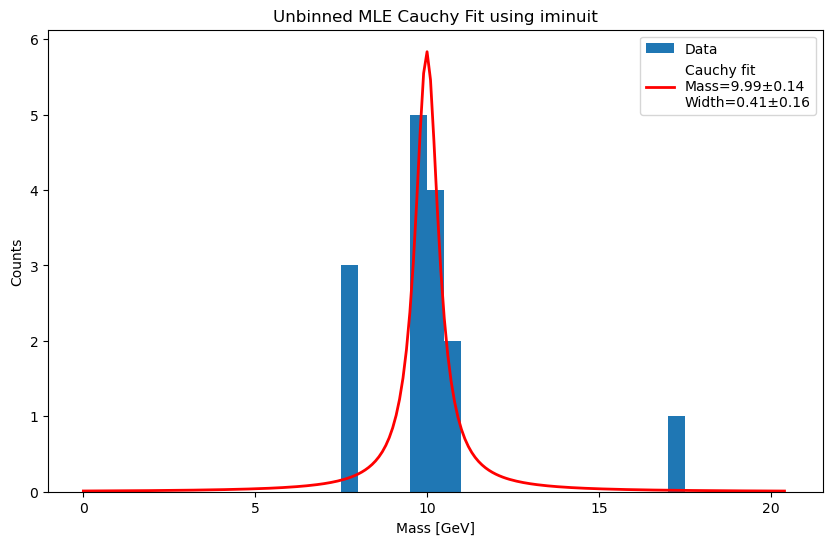

In [28]:
# TODO: Display fit results in the histogram with parameter errors

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(edges[:-1], edges, weights=counts, label='Data')

# Overlay cauchy pdf from minuit fit params
pdf_vals = cauchy.pdf(xx, loc=loc_fit, scale=scale_fit)
N_total = len(mass) # number of measurements
ax.plot(xx, pdf_vals*N_total*binSize, 'r-', lw=2,
        label=f'Cauchy fit\nMass={loc_fit:.2f}±{loc_err:.2f}\nWidth={scale_fit:.2f}±{scale_err:.2f}')

ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('Counts')
ax.set_title('Unbinned MLE Cauchy Fit using iminuit')
ax.legend()
plt.show()


# Discussion and Analysis

**Answer the following questions based on your results:**


## Task 2 Discussion: Maximum Likelihood Estimation

**Question 1:** Analyze your NLL contour plots and parameter estimation results. What does the shape of the contours tell you about parameter correlations? How sensitive is the fit to small changes in the mass and width parameters? Compare your best-fit parameters to your initial theoretical prediction from Task 1.

**Answer:**

Contour lines closer together <-> "Steeper slope"

Steeper slope means higher sensitivity: for a fixed $\Delta r$ the corresponding $\Delta h$ is higher given steeper slope (mountain analogy)

Our contour plot is roughly symmetric about the mass parameter (left-right), but very asymmetric about the scale factor (up-down). It gets more sensitive to fit to small changes in width as the width parameter gets smaller and smaller. 

Comparing *overall* sensitivity to mass vs width, they are somewhat similar. Veeeery roughly circular contour (..squint your eyes) and the y axis and x axis scales are similar (ylim spans 1.2, xlim 1.0)

---

## Task 3 Discussion: Method Comparison

**Question 2:** Compare the likelihood profile and chi-squared methods. Which method gave a more precise estimate of the mass parameter? How do the shapes of the two curves differ near the minimum? Explain why the maximum likelihood method is generally preferred for small datasets like ours (15 data points).

**Answer:**

Chi2 looks hyperbolic and is concave up. Rapidly increases as you move away from the minimum.

NLL is concave up near the minimum, but is concave down as you move away from the minimum.

Both minimums are not too far away from each other (less than the bin width of 0.5) which is not too bad given that chi squared required binned data, as opposed to MLE method using unbinned, 'raw' data.

Due to this nature, MLE method is more precise than chi squred method. Unbinned data points are "weighted" "correctly" (for the lack of my vocabulary??.. you know what I mean), whereas binned data forces all data points within the bin to hold the same weight.

This problem becomes more prominent the smaller the sample size. In other words, the larger the sample, the "thinner" (relative) the bins can get. MLE method does not suffer from this "incorrect weighting" so it is preferable when the number of data points are small like our dataset.

---

## Model Comparison and Overall Analysis

**Question 3:** Compare all the fitting approaches you used (manual grid search, scipy optimization, and iminuit if completed). Did they all converge to the same parameter values? Which method was most efficient? Which provided the most complete uncertainty information?

**Answer:**

I used grid search, chi2, and iminuit. (I don't think the template asked for scipy optimization, unless I accidently deleted the cells...)

I assume the iminuit to perform the best since the instruction says to "Use the iminuit package for ***professional*** maximum likelihood fitting".

Comparing to iminuit fits, grid search performed better than chi squared for estimating mass parameter. It would have performed even better if the ranges for parameters (and thus also the meshgrid) was more densely spaced, but that would be really expensive! (calculate NLL for each element in the 2d grid!!) It was already pretty slow (though I didn't quantify it) to run the search for 300x300 grid... Chi squared was fast, compared to grid search.

Iminuit was pretty fast! though I cannot directly compare the time to other methods at this time... I should've timed them.

In the scope of our estimation for mass, all methods converge. Also I did not calculate uncertainties for NLL and chi2...